<a href="https://colab.research.google.com/github/jcorner1/MMH_Project/blob/main/Super_Resoultion_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Resoultion Image

Code made from the notebook from here (https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/hub/tutorials/image_enhancing.ipynb#scrollTo=ABjkkJHC2jNL).

In [1]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [2]:
# Declaring Constants
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [3]:
def preprocess_image(hr_image):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  #hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [4]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

# Load the Image

In [5]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from osgeo import gdal
gdal.UseExceptions()

# open the .sid file
dataset = gdal.Open(r'/content/drive/My Drive/Colab Notebooks/Sat_Images/Mobile_Homes.tif')

In [7]:
# get the RGB raster bands
band1 = dataset.GetRasterBand(1)
band2 = dataset.GetRasterBand(2)
band3 = dataset.GetRasterBand(3)

# read the data as a numpy array
data1 = band1.ReadAsArray()
data2 = band2.ReadAsArray()
data3 = band3.ReadAsArray()

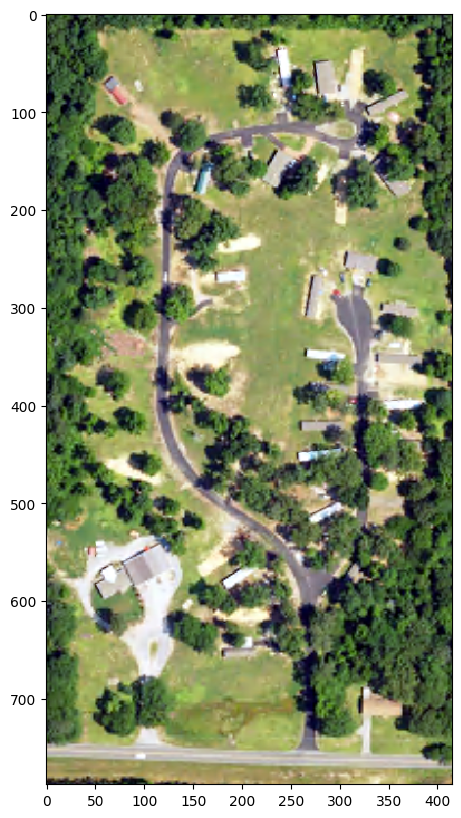

In [8]:
import numpy as np

# create a color image using the 3 RGB bands
color_image = np.dstack((data1, data2, data3))

#subset the data based on the indicated max and min, x and y values.
new_color_image = color_image[75:863, 145:560, :]

#enlargen the plot
fig = plt.figure(figsize=(11, 10))

# display the color image
plt.imshow(new_color_image)
plt.show()


# Load Model

In [9]:
model = hub.load(SAVED_MODEL_PATH)

# Create Super-Resoultion Image

In [10]:
hr_image = preprocess_image(new_color_image)
hr_image.shape

TensorShape([1, 788, 412, 3])

In [11]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 63.833850


In [12]:
fake_image.shape

TensorShape([3152, 1648, 3])

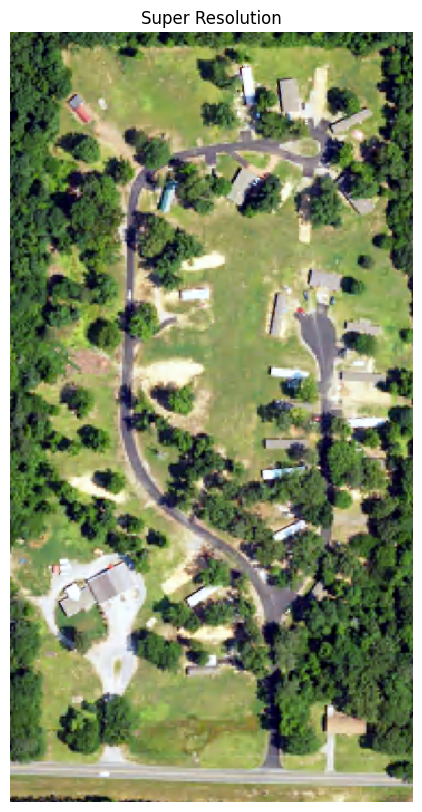

In [13]:
#enlargen the plot
fig = plt.figure(figsize=(11, 10))

# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")